<a href="https://colab.research.google.com/github/lee-jaejoon/lee-jaejoon.github.io/blob/master/MNIST%20Vanilla%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt


class CustomHistory(tf.keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []       
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.005)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

custom_hist = CustomHistory()
custom_hist.init()

model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size = 100, callbacks=[custom_hist],verbose=0)



In [28]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


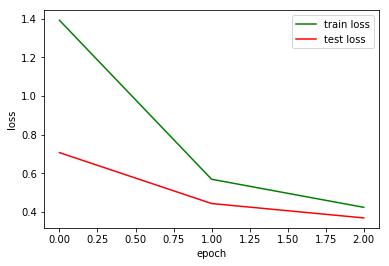

In [29]:
#fig, lossplot = plt.subplots()
#lossplot.plot(custom_hist.train_loss, 'g-', label='train loss')
#lossplot.plot(custom_hist.val_loss, 'r-', label='val loss')
#lossplot.set_xlabel('epoch')
#lossplot.set_ylabel('loss')
#lossplot.legend(loc='upper right')
#plt.show()

plt.plot(custom_hist.train_loss, 'g-', label='train loss')
plt.plot(custom_hist.val_loss, 'r-', label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()